<a href="https://colab.research.google.com/github/egonik-unlp/labo/blob/main/tasso/analisis_atr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/egonik-unlp/labo.git

Cloning into 'labo'...
remote: Enumerating objects: 501, done.
remote: Counting objects: 100% (501/501), done.
remote: Compressing objects: 100% (363/363), done.
remote: Total 501 (delta 141), reused 474 (delta 119), pack-reused 0
Receiving objects: 100% (501/501), 22.37 MiB | 21.69 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [1]:
!pip install agilentaspparser

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as s
import agilentaspparser as asp
plt.style.use('ggplot')


In [34]:
%cd /content/labo/tasso/colo
spectra = asp.load_dir('.').as_pandas()

spectra.to_csv('../../../datos_mariana_tasso.csv') 

/content/labo/tasso/colo


In [45]:
peaks_alles = {}

In [35]:
spectra.rename(columns = {'papel_solo_2021-05-20T10-33-06':'referencia'}, inplace=True)

In [36]:
ref = spectra.pop('referencia')


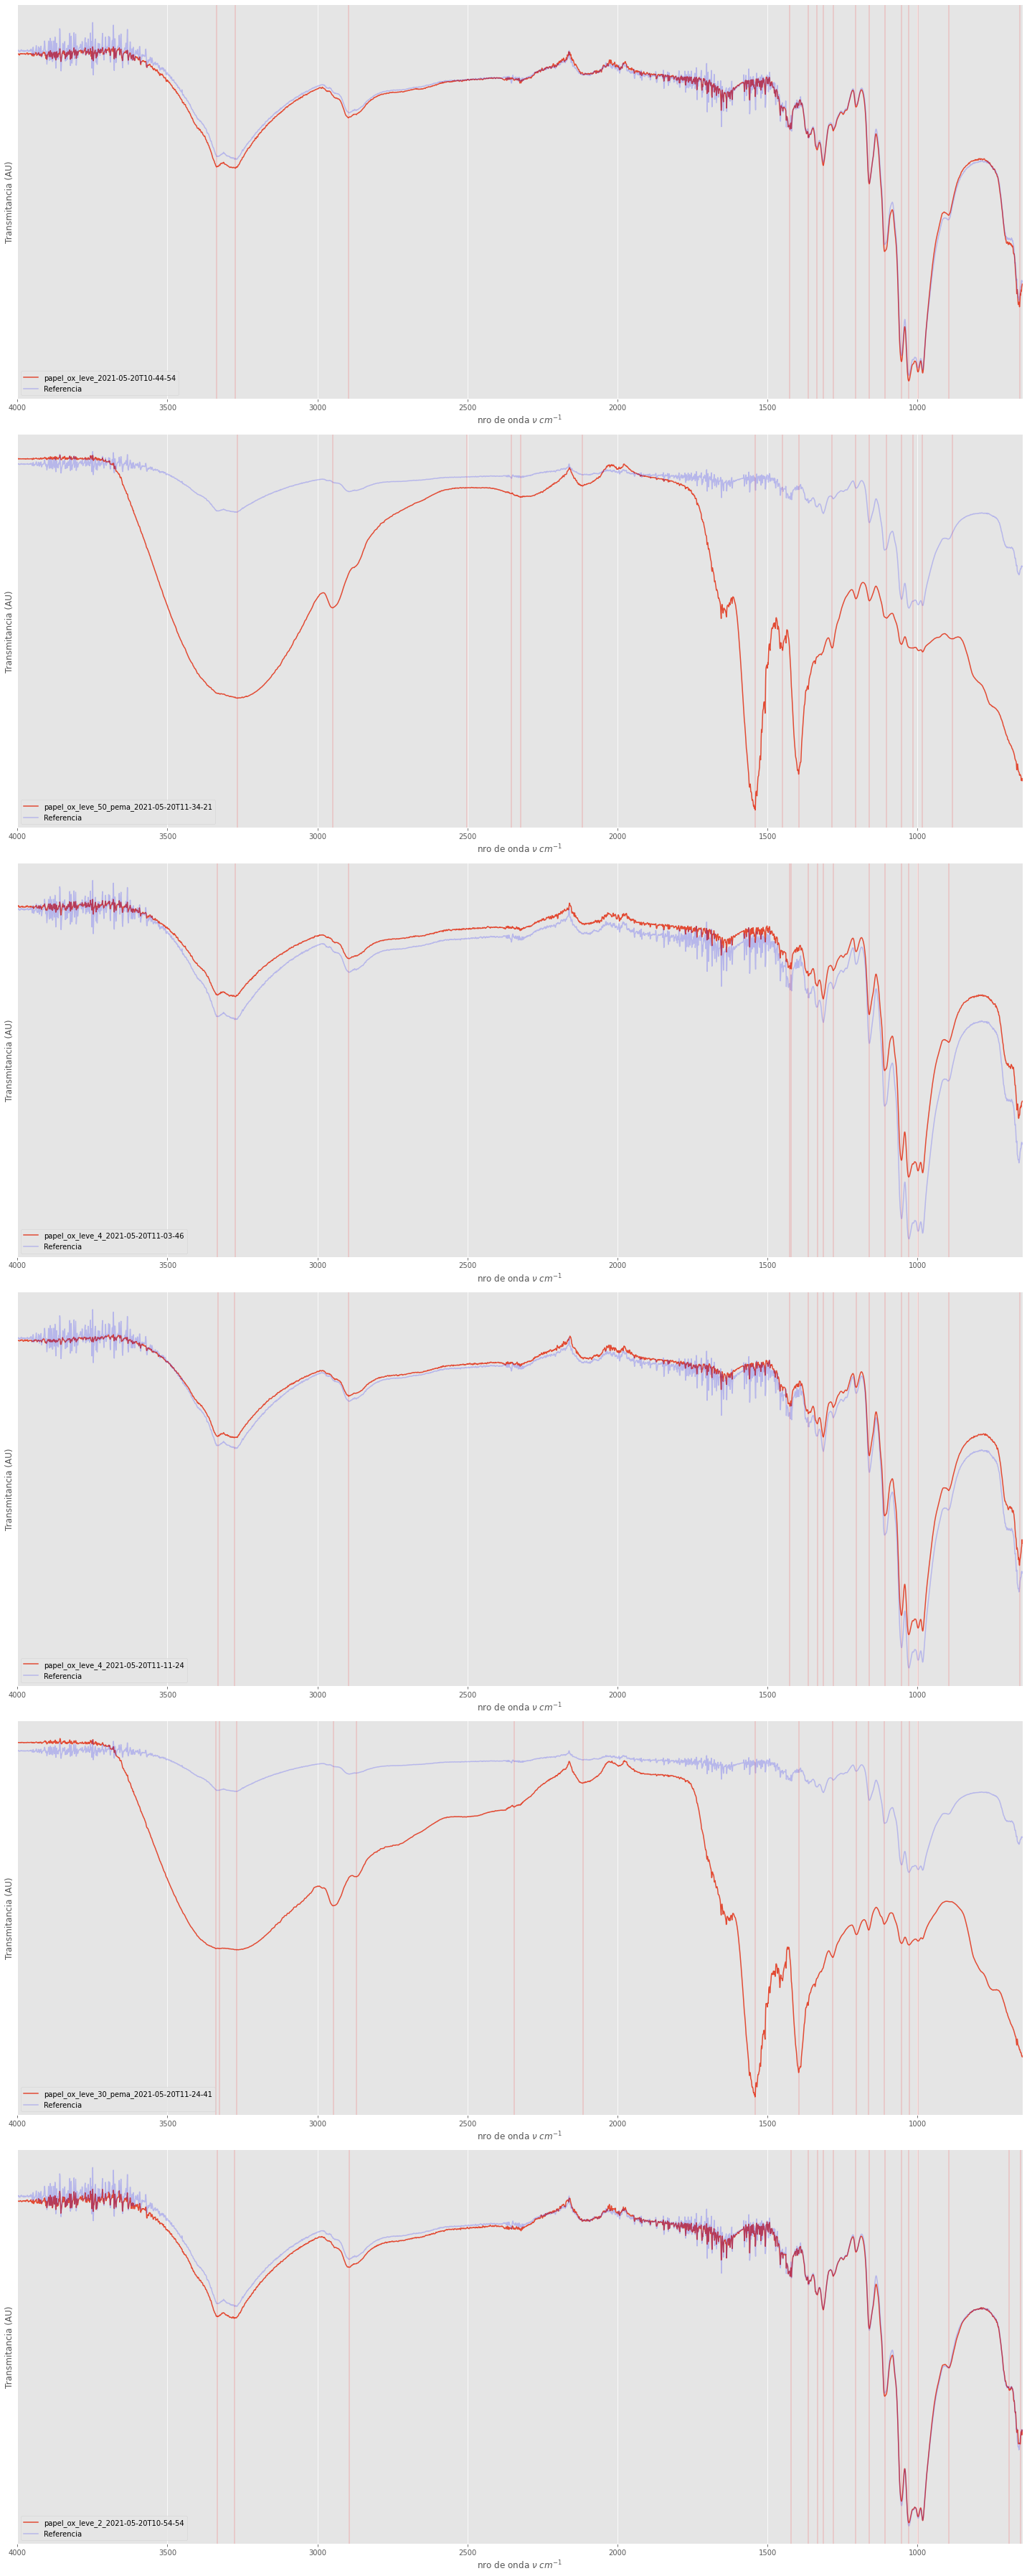

In [53]:
fig, ax = plt.subplots(6,1, figsize = (20,50))
ax = ax.flatten()
for n,spectrum in enumerate(spectra):
  peaks = s.find_peaks(100- spectra[spectrum].values, height = 5, width = 7)[0]
  ax[n].plot(spectra[spectrum], label = spectrum)
  ax[n].plot(ref, c = 'b', alpha = .2, label = 'Referencia')
  ax[n].set_xlabel(r'nro de onda $\nu$ $cm^{-1}$')
  ax[n].set_ylabel('Transmitancia (AU)')
  ax[n].set_yticks([])
  ax[n].legend()
  for nu in spectra[spectrum].iloc[peaks].index:
    ax[n].axvline(nu, color = 'red', alpha = .15)
  ax[n].set_xlim(4000,650)
  peaks_alles[spectrum] = list(peaks)
plt.savefig('../../../graficos_mariana_tasso.png')
plt.tight_layout()
plt.show()

In [52]:
peaks_alles
import json
with open('peaks.json', 'w') as file:
  json.dump(peaks_alles, file)

TypeError: ignored